# Librerias

In [1]:
#Importemos las librerias Necesarias:
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib
import random
import time

In [2]:
from sklearn.utils import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.svm import SVC

***

## Empecemos cargando la infromacion

In [3]:
# Empecemos por adecuar los datos:
rf = open('pop_failures.csv', 'r')  # Abrimos el archivo

# Obtenemos los nombres de las columnas:
cols = list()
for item in rf.readline()[:-1].split(' '):
    if item is not '':
        cols.append(item)

# Limpiamos el resto de infromacion convirtiendola en una lista de listas
data = list()        
for item in rf.readlines():
    list(item.strip().split())
    data.append(list(item.strip().split()))

In [4]:
#contertimos lo anterior en un DataFrame
df = pd.DataFrame(data, columns=cols)

# Eliminemos las dos primeras columnas:
df = df.drop([cols[0], cols[1]], axis=1)
cols = df.columns

#convirtamos la informacion a su tipo correspondiente:
for col in cols:
    df[col] = pd.to_numeric(df[col])
    
print(df.head()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


**Analicemos el dataset antes de empezar a trabajar con el:**

In [5]:
# Analicemos si la variable objetivo está equilibrada
print(f'Outcome positivo:{df[cols[-1]].sum()}\nOutcome negativo:{len(df)-df[cols[-1]].sum()}')

Outcome positivo:494
Outcome negativo:46


In [6]:
df.describe()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,0.500044,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,0.288860,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,0.003231,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,0.252661,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,0.500295,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,0.748605,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,0.997172,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


**Visto que la clase objetivo está bastante descompensada, crearemos un df_train undersampleado:**

In [7]:
seed = random.randint(0,10)

df_rsmpl = resample(
    df[df[cols[-1]] == 1],
    random_state = seed,
    n_samples = df[df[cols[-1]] == 0].shape[0]
)

# Unamos ambos df
df_train = pd.concat([df[df[cols[-1]] == 0], df_rsmpl]).sample(frac=1)  # mezclemos el modelo para realizar las particiones
df_train.head()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
291,0.783335,0.892363,0.802123,0.984419,0.212193,0.808875,0.264226,0.969816,0.144152,0.741067,0.385611,0.071712,0.935856,0.227156,0.567388,0.049070,0.375561,0.104410,0
231,0.870579,0.454674,0.894270,0.011855,0.282640,0.943005,0.555407,0.411043,0.875675,0.483847,0.207331,0.015665,0.547360,0.119795,0.436438,0.408788,0.853762,0.020764,1
503,0.864878,0.710434,0.920800,0.304012,0.964132,0.698496,0.307317,0.019251,0.302058,0.043415,0.071086,0.361100,0.133086,0.580487,0.523823,0.608569,0.160936,0.837637,1
161,0.090576,0.688366,0.148453,0.345999,0.520858,0.961267,0.084060,0.470789,0.788637,0.659405,0.248957,0.990095,0.425995,0.293008,0.619823,0.113544,0.035988,0.047556,1
438,0.859811,0.125104,0.535767,0.191043,0.453512,0.103253,0.520529,0.075624,0.643725,0.677997,0.273790,0.418693,0.467325,0.387609,0.857478,0.957464,0.038266,0.315119,1


In [8]:
# hagamos una reduccion de variables:
seed = random.seed(time.time())#para que los split no se repitan al ejecutar la celda

#hagamos la separacion de datos:
X = df.drop(cols[-1], axis=1)
y = df[cols[-1]]

# Nos quedaremos con las variables cuyos pesos sean mayores de 0.01
sel = mutual_info_classif(X, y, random_state=seed)
for i in range(len(sel)):
    if sel[i] < 0.01: # Filtramos las variables por su peso
        df = df.drop(cols[i], axis=1)
        df_train = df_train.drop(cols[i], axis=1)

cols = df.columns

**Desde aqui crearemos los conjuntos train empleando el df_train y test empleando el df original**:

In [9]:
X_train_, X_test, y_train_, y_test = train_test_split(
    df.drop(cols[-1], axis=1),
    df[cols[-1]],
    test_size=0.3,
    random_state=random.randint(0,10)
)
X_train = df_train.drop(cols[-1], axis=1)
y_train = df_train[cols[-1]]

In [10]:
# Escalemos los datos para evitar que ninguna variable se coma a las demas:
scal = RobustScaler()
scal.fit(X_train)
X_train = pd.DataFrame(scal.transform(X_train), columns=cols[:-1])
x_train_ = pd.DataFrame(scal.transform(X_train_), columns=cols[:-1])
X_test = pd.DataFrame(scal.transform(X_test), columns=cols[:-1])

**Creemos el Support Vector Machine:**

In [11]:
model = SVC(
    C=1,
    class_weight='balanced',
    kernel='rbf',
    gamma=0.1
)

**Empleemos el df undersampleado para ver los resultados:**

In [12]:
model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.1)

Balanced acc: 0.9210526315789473


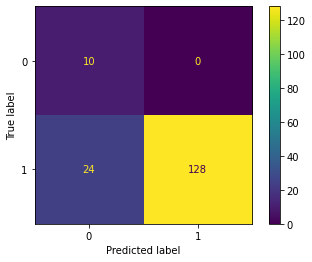

In [13]:
y_pred_und = model.predict(X_test)
print(f'Balanced acc: {balanced_accuracy_score(y_test, y_pred_und)}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_und)).plot()
matplotlib.pyplot.show() 

**Empleemos ahora el df original:**

In [14]:
model.fit(X_train_, y_train_)

SVC(C=1, class_weight='balanced', gamma=0.1)

Balanced acc: 0.55


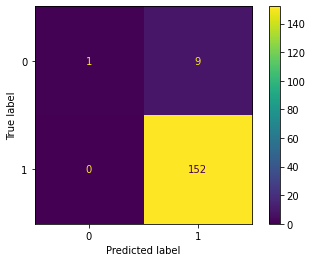

In [15]:
y_pred = model.predict(X_test)
print(f'Balanced acc: {balanced_accuracy_score(y_test, y_pred)}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
matplotlib.pyplot.show() 

Nótese que el modelo con el que se ha empleado el df undersampleado es mas preciso que el modelo con el df original por lo que emplearemos el df undersampleado para intentar hallar la mejor combinación de parametros:

Balanced acc: 0.9605263157894737


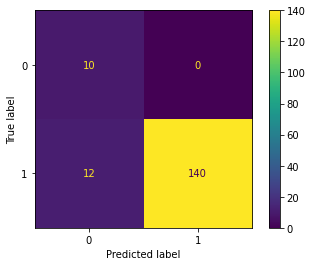

In [16]:
model = SVC(
    C=20,
    class_weight='balanced',
    kernel='rbf',
    gamma='auto'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Balanced acc: {balanced_accuracy_score(y_test, y_pred)}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
matplotlib.pyplot.show() 

La mejor precisión lograda ha sido con los parametros mostrados.

***

# Notas:

> Nota 1

# Bibliografia:

   * scikit Learn: https://scikit-learn.org/stable/index.html